<a href="https://colab.research.google.com/github/EhLeeOod/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales


- Author: Eliud Uresti

## Project Overview

## Load and Inspect Data



In [1]:
import pandas as pd
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"

df_sales = pd.read_csv(fpath)
df_sales.info()
df_sales.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [2]:
#1) How many rows and columns?
# 8523 rows, 12 columns
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
# 2) What are the datatypes of each variable?
# string, float, int
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# 3) Are there duplicates? If so, drop any duplicates.
# no dups
df_sales.duplicated().sum()


0

In [5]:
# 4) Identify missing values
null_sum = df_sales.isna().sum()
null_sum

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# 5) Address the missing values by using a placeholder value.

num_cols = df_sales.select_dtypes('number').columns
df_sales[num_cols] = df_sales[num_cols].fillna(-1)

cat_cols = df_sales.select_dtypes('object').columns
df_sales[cat_cols] = df_sales[cat_cols].fillna('MISSING')

In [7]:
# 6) Confirm that there are no missing values after addressing them.
df_sales[num_cols].isna().sum()
df_sales[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [8]:
# 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
for column in cat_cols:
    print(df_sales[column].value_counts())
    print("\n")

df_sales.replace({"LF":"Low Fat", "low fat":"Low Fat", "reg":"Regular"}, inplace = True)

for column in cat_cols:
    print(df_sales[column].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Mediu

In [9]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

df_sales[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

In [10]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Histograms to view the distributions of numerical features in your dataset.


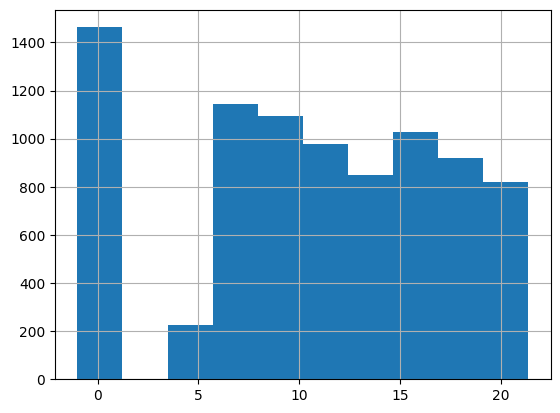

In [11]:
# preview numeric columns
df_sales[num_cols].head()

# create histograms based on the above
item_weight_hist = df_sales['Item_Weight'].hist()

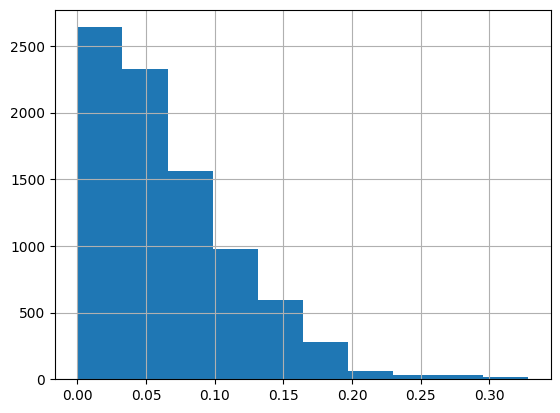

In [12]:
item_visibility_hist = df_sales['Item_Visibility'].hist()

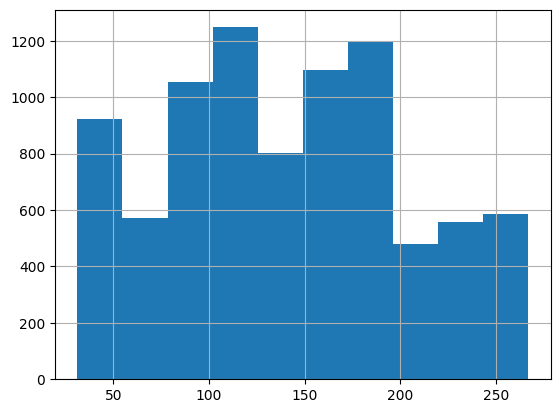

In [14]:
item_mrp_hist = df_sales['Item_MRP'].hist()

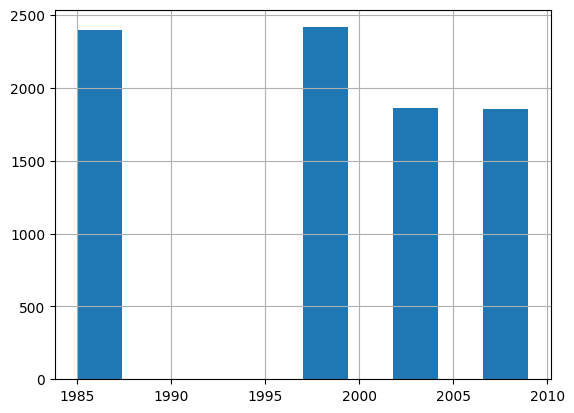

In [15]:
outlet_year_hist = df_sales['Outlet_Establishment_Year'].hist()

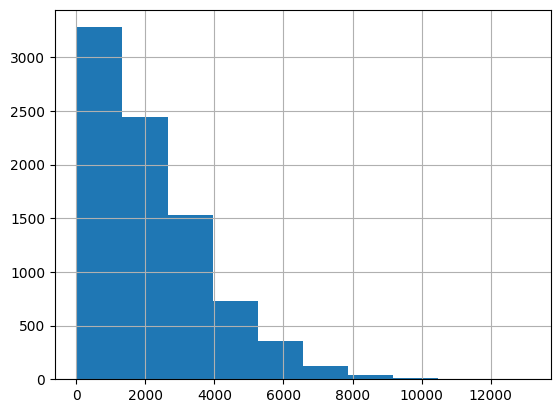

In [16]:
outlet_sales_hist = df_sales['Item_Outlet_Sales'].hist()

### Boxplots to view statistical summaries of numerical features in your dataset.


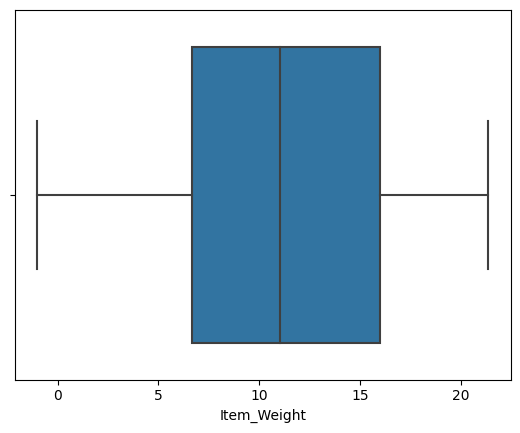

In [17]:
ax1 = sns.boxplot(data=df_sales, x='Item_Weight')

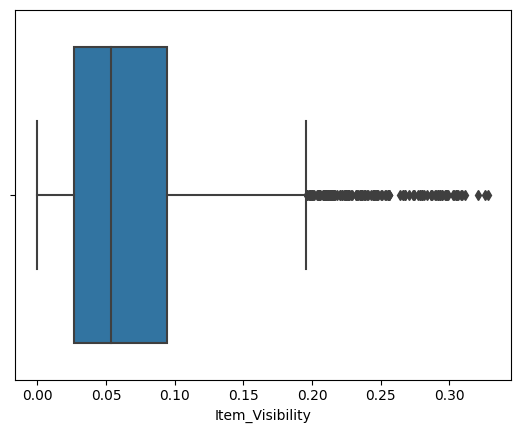

In [18]:
ax2 = sns.boxplot(data=df_sales, x='Item_Visibility')

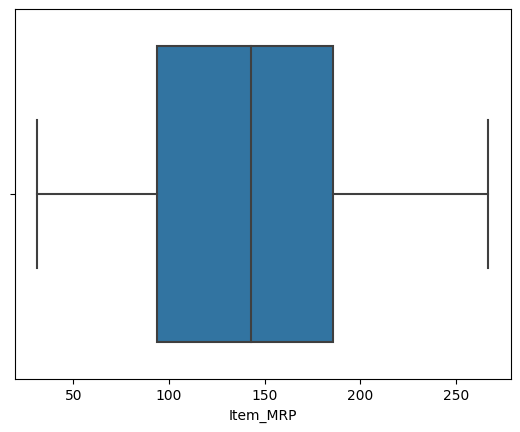

In [19]:
ax3 = sns.boxplot(data=df_sales, x='Item_MRP')

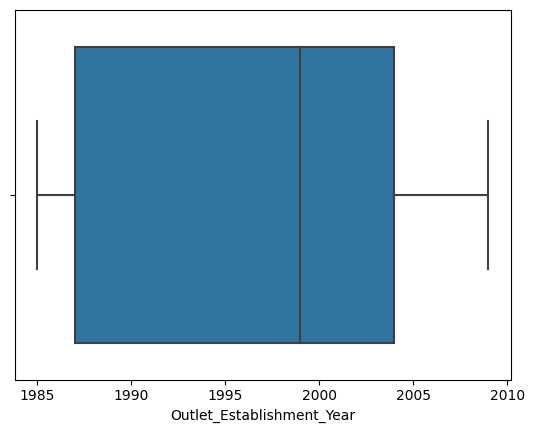

In [20]:
ax4 = sns.boxplot(data=df_sales, x='Outlet_Establishment_Year')

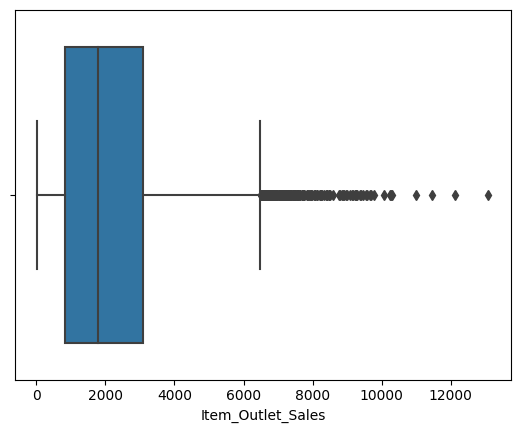

In [21]:
ax5 = sns.boxplot(data=df_sales, x='Item_Outlet_Sales')

### Countplots to view the frequency of each class of categorical features in your dataset.


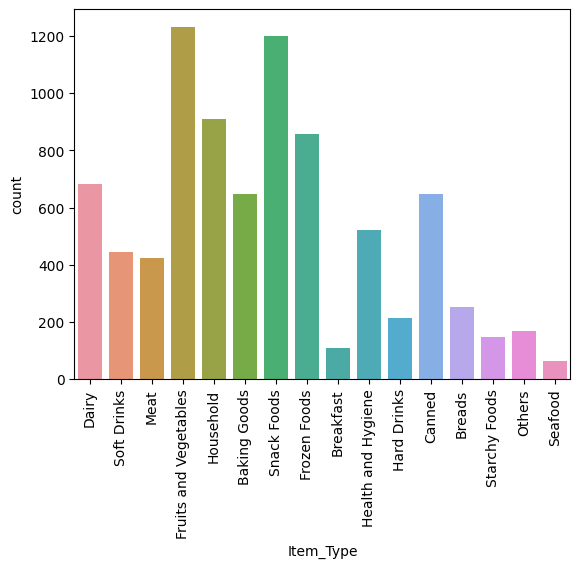

In [22]:
ax = sns.countplot(data=df_sales,x='Item_Type');
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

### Heatmap to view the correlation between features.

<ipython-input-24-7cb16845d4ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_sales.corr()


<Axes: >

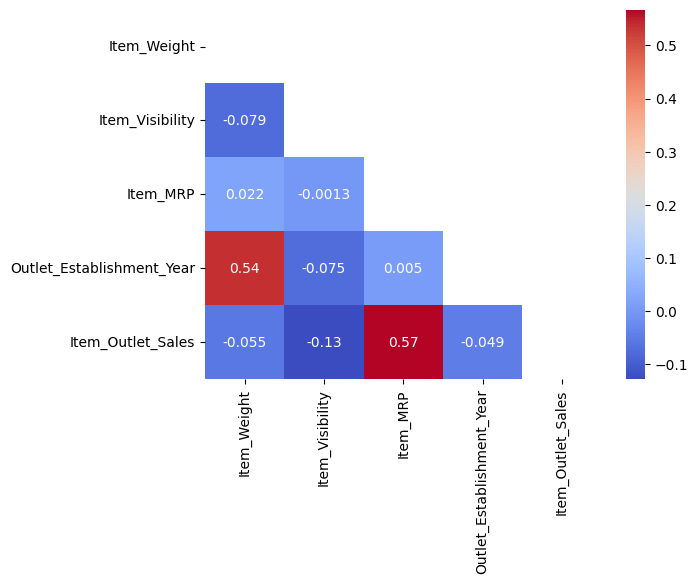

In [24]:
corr = df_sales.corr()
corr.round(2)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, mask = mask)

## Feature Inspection